## Software requirements classification using Machine Learning and NLP

The objective of this project is to offer insights into the comparative performance of classifiers by employing common machine learning algorithms and feature extraction techniques within the domain of natural language processing.

## Phase 1: NLP Preprocessing

In [36]:
# importing warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [37]:
#importing pandas and loading dataset
import pandas as pd
pd.set_option('display.max_colwidth', None)


dataset = pd.read_csv('software_requirements_extended.csv')
dataset.head(10)

,Type,Requirement
0,PE,The system shall refresh the display every 60 seconds.
1,LF,The application shall match the color of the schema set forth by Department of Homeland Security
2,US,If projected the data must be readable. On a 10x10 projection screen 90% of viewers must be able to read Event / Activity data from a viewing distance of 30
3,A,The product shall be available during normal business hours. As long as the user has access to the client PC the system will be available 99% of the time during the first six months of operation.
4,US,If projected the data must be understandable. On a 10x10 projection screen 90% of viewers must be able to determine that Events or Activities are occuring in current time from a viewing distance of 100
5,SE,The product shall ensure that it can only be accessed by authorized users. The product will be able to distinguish between authorized and unauthorized users in all access attempts
6,US,The product shall be intuitive and self-explanatory.
7,PE,The product shall respond fast to keep up-to-date data in the display.
8,F,The system shall have a MDI form that allows for the viewing of the graph and the data table.
9,F,The system shall display Events in a vertical table by time.


In [38]:
# checking info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Type         977 non-null    object
 1   Requirement  977 non-null    object
dtypes: object(2)
memory usage: 15.4+ KB


In [39]:
# checking description of the dataset
dataset.describe()

,Type,Requirement
count,977,977
unique,14,976
top,FR,Only registered customers can purchase streaming movies.
freq,312,2


In [40]:
## Converting the read dataset in to a list of tuples, each tuple(row) contianing the message and it's label
data_set = []
for index,row in dataset.iterrows():
    data_set.append((row['Type'], row['Requirement']))

<Axes: >

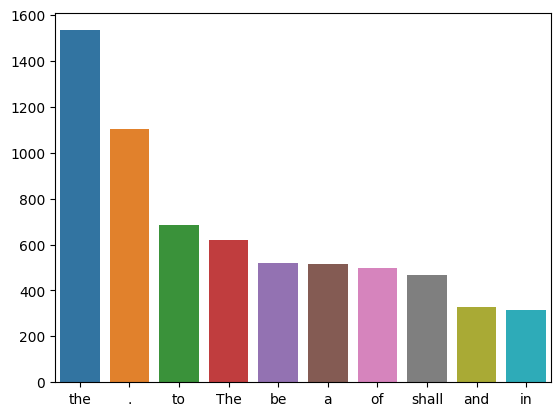

In [41]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import numpy as np
from nltk import FreqDist
import seaborn as sns

# plotting freq distribution to check the stopwords
def plot_word_frequency(words, top_n=10):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plot = sns.barplot(x=labels, y=counts)
    return plot


words = [word_tokenize(text) for label, text in data_set]

merged_text = []
[merged_text.extend(sublist) for sublist in words]
plot_word_frequency(merged_text)

In [42]:
# NLP preprocessing steps combined
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import numpy as np
from nltk import FreqDist
import seaborn as sns

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
        
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    
    # Removing punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Preprocess the dataset
preprocessed_dataset = [(label, preprocess_text(text)) for label, text in data_set]

[nltk_data] Downloading package punkt to /Users/sarab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/sarab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sarab/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
# Importing necessary libraries for model building and word vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Separate labels and preprocessed texts
labels, texts = zip(*preprocessed_dataset)

In [44]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [45]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [46]:
# Word2Vec Vectorization
word2vec_model = Word2Vec(sentences=[text.split() for text in texts], min_count=1)
word2vec_words = set(word2vec_model.wv.index_to_key)

In [47]:
def word_averaging(model, words):
    all_words, mean = set(), []
    
    for word in words:
        if word in model.wv:
            mean.append(model.wv[word])
            all_words.add(model.wv.key_to_index[word])
    
    if not mean:
        return np.zeros(model.vector_size,)
    
    mean = np.array(mean).mean(axis=0)
    return mean

def word_vectorizer(model, documents):
    return np.vstack([word_averaging(model, doc.split()) for doc in documents])

X_train_word2vec = word_vectorizer(word2vec_model, X_train)
X_test_word2vec = word_vectorizer(word2vec_model, X_test)

In [48]:
# Model Building and Evaluation
# You can replace these placeholders with your preferred ML algorithms
# For simplicity, let's use Logistic Regression and Random Forest for demonstration

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Define empty dictionaries to store results
results_tfidf = {}
results_word2vec = {}

# Train and evaluate models for TF-IDF
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(accuracy)
    results_tfidf[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

print(results_tfidf)

/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6224489795918368
0.6428571428571429
{'Logistic Regression': {'Accuracy': 0.6224489795918368, 'Precision': 0.5962676141885325, 'Recall': 0.6224489795918368, 'F1 Score': 0.5452592767668994}, 'Random Forest': {'Accuracy': 0.6428571428571429, 'Precision': 0.5890334556441623, 'Recall': 0.6428571428571429, 'F1 Score': 0.5847332529070742}}


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# Train and evaluate models for Word2Vec
for name, model in models.items():
    model.fit(X_train_word2vec, y_train)
    y_pred = model.predict(X_test_word2vec)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results_word2vec[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# Print the results
print("Results for TF-IDF:")
for model, scores in results_tfidf.items():
    print(f"{model}: {scores}")

print("\nResults for Word2Vec:")
for model, scores in results_word2vec.items():
    print(f"{model}: {scores}")

Results for TF-IDF:
Logistic Regression: {'Accuracy': 0.6224489795918368, 'Precision': 0.5962676141885325, 'Recall': 0.6224489795918368, 'F1 Score': 0.5452592767668994}
Random Forest: {'Accuracy': 0.6428571428571429, 'Precision': 0.5890334556441623, 'Recall': 0.6428571428571429, 'F1 Score': 0.5847332529070742}

Results for Word2Vec:
Logistic Regression: {'Accuracy': 0.3469387755102041, 'Precision': 0.17548217788988252, 'Recall': 0.3469387755102041, 'F1 Score': 0.20741253186773767}
Random Forest: {'Accuracy': 0.5051020408163265, 'Precision': 0.4616366026930252, 'Recall': 0.5051020408163265, 'F1 Score': 0.4239851710381279}
